In [48]:
import os
import sys
import glob
import scipy
import sklearn
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
sns.set_style('whitegrid')
pd.set_option('display.max_rows', 100)
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['pdf.fonttype'] = 42
pd.set_option('display.max_columns', 100)

sns.set_palette("Set2")


In [49]:
data_loc = '/home/mattolm/user_data/IndianMicrobiome/tables/'
Pdb = pd.read_csv(data_loc + 'IndianMicrobiome_basicinfo_v2.csv')
Pdb.head()


sample                                              read1  \
0    AK_SR_1  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
1    AK_SR_2  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
2  AK_SR_2.2  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
3    AK_SR_3  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
4    AK_SR_4  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   

                                               read2            library_key  \
0  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...    LibPlate-A2_AK-SR-1   
1  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...    LibPlate-A4_AK-SR-2   
2  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...  LibPlate-D2_AK-SR-2-2   
3  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...    LibPlate-A6_AK-SR-3   
4  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...    LibPlate-A8_AK-SR-4   

   tribe  DNA_concentration sample_type fecal_sample     pairs       bases  \
0  Kabui               51.5       fecal          NaN  24276525  6938547858   
1  Kabui               28.7       fecal          NaN  25189547  7192762783   
2  Kabui               92.8       fecal          NaN  11357247  3183231459   
3  Kabui              411.8       fecal          NaN   5682989  1595248519   
4  Kabui               83.3       fecal          NaN   5552061  1578724021   

   raw_pairs    raw_bases          RL  
0   40041788  11692202096  142.906529  
1   30917233   9027832036  142.772770  
2   20045323   5853234316  140.140980  
3   11410676   3331917392  140.352948  
4    6520759   1904061628  142.174593

In [50]:
GPdb = pd.read_csv(data_loc + 'IndianMicrobiome_genomeSetDelta_v1.csv')
GPdb


genome   length   breadth  \
0                                    GUT_GENOME000001.fna  3221717  0.000057   
1                                    GUT_GENOME000010.fna  3707250  0.006564   
2                                    GUT_GENOME000017.fna  3932530  0.000080   
3                                    GUT_GENOME000020.fna  2823639  0.000069   
4                                    GUT_GENOME000024.fna  2221226  0.000263   
...                                                   ...      ...       ...   
346715  REFINED_METABAT215_TOP10_CONTIGS_1500_ASSEMBLY...  1911315  0.000229   
346716  REFINED_METABAT215_TOP10_CONTIGS_1500_ASSEMBLY...  2018403  0.009218   
346717  REFINED_METABAT215_TOP10_CONTIGS_1500_ASSEMBLY...  5186897  0.000025   
346718  REFINED_METABAT215_TOP10_CONTIGS_1500_ASSEMBLY...  2746266  0.000157   
346719  REFINED_METABAT215_TOP10_CONTIGS_1500_ASSEMBLY...  1734394  0.001236   

        coverage  reads                                        IS_location  \
0       0.000091      2  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
1       0.014668    384  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
2       0.000133      4  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
3       0.000104      2  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
4       0.000647     11  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
...          ...    ...                                                ...   
346715  0.000307      4  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
346716  0.017025    243  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
346717  0.000050      2  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
346718  0.000620     12  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
346719  0.002701     34  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   

                                                 GTDB_tax  UHGG_in_cluster  \
0       d__Bacteria;p__Firmicutes_A;c__Clostridia;o__P...             True   
1       d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...             True   
2       d__Bacteria;p__Firmicutes_A;c__Clostridia;o__P...             True   
3       d__Bacteria;p__Firmicutes;c__Bacilli;o__Staphy...             True   
4       d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...             True   
...                                                   ...              ...   
346715  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...            False   
346716  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...            False   
346717  d__Bacteria;p__Verrucomicrobiota;c__Lentisphae...             True   
346718  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...             True   
346719  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...            False   

        GTDB_novel_species    sample    pairs        rel_ab  
0                     True  AK_SG_10  3815123  2.621147e-07  
1                    False  AK_SG_10  3815123  5.032603e-05  
2                    False  AK_SG_10  3815123  5.242295e-07  
3                    False  AK_SG_10  3815123  2.621147e-07  
4                    False  AK_SG_10  3815123  1.441631e-06  
...                    ...       ...      ...           ...  
346715                True     TS8_B  6058407  3.301198e-07  
346716                True     TS8_B  6058407  2.005478e-05  
346717               False     TS8_B  6058407  1.650599e-07  
346718               False     TS8_B  6058407  9.903593e-07  
346719                True     TS8_B  6058407  2.806018e-06  

[346720 rows x 12 columns]

In [47]:
GPdb

genome   length   breadth  \
0                                    GUT_GENOME000001.fna  3221717  0.000057   
1                                    GUT_GENOME000010.fna  3707250  0.006564   
2                                    GUT_GENOME000017.fna  3932530  0.000080   
3                                    GUT_GENOME000020.fna  2823639  0.000069   
4                                    GUT_GENOME000024.fna  2221226  0.000263   
...                                                   ...      ...       ...   
346715  REFINED_METABAT215_TOP10_CONTIGS_1500_ASSEMBLY...  1911315  0.000229   
346716  REFINED_METABAT215_TOP10_CONTIGS_1500_ASSEMBLY...  2018403  0.009218   
346717  REFINED_METABAT215_TOP10_CONTIGS_1500_ASSEMBLY...  5186897  0.000025   
346718  REFINED_METABAT215_TOP10_CONTIGS_1500_ASSEMBLY...  2746266  0.000157   
346719  REFINED_METABAT215_TOP10_CONTIGS_1500_ASSEMBLY...  1734394  0.001236   

        coverage  reads                                        IS_location  \
0       0.000091      2  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
1       0.014668    384  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
2       0.000133      4  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
3       0.000104      2  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
4       0.000647     11  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
...          ...    ...                                                ...   
346715  0.000307      4  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
346716  0.017025    243  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
346717  0.000050      2  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
346718  0.000620     12  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
346719  0.002701     34  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   

                                                 GTDB_tax  UHGG_in_cluster  \
0       d__Bacteria;p__Firmicutes_A;c__Clostridia;o__P...             True   
1       d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...             True   
2       d__Bacteria;p__Firmicutes_A;c__Clostridia;o__P...             True   
3       d__Bacteria;p__Firmicutes;c__Bacilli;o__Staphy...             True   
4       d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...             True   
...                                                   ...              ...   
346715  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...            False   
346716  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...            False   
346717  d__Bacteria;p__Verrucomicrobiota;c__Lentisphae...             True   
346718  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...             True   
346719  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...            False   

        GTDB_novel_species    sample    pairs        rel_ab    domain  \
0                     True  AK_SG_10  3815123  2.621147e-07  Bacteria   
1                    False  AK_SG_10  3815123  5.032603e-05  Bacteria   
2                    False  AK_SG_10  3815123  5.242295e-07  Bacteria   
3                    False  AK_SG_10  3815123  2.621147e-07  Bacteria   
4                    False  AK_SG_10  3815123  1.441631e-06  Bacteria   
...                    ...       ...      ...           ...       ...   
346715                True     TS8_B  6058407  3.301198e-07  Bacteria   
346716                True     TS8_B  6058407  2.005478e-05  Bacteria   
346717               False     TS8_B  6058407  1.650599e-07  Bacteria   
346718               False     TS8_B  6058407  9.903593e-07  Bacteria   
346719                True     TS8_B  6058407  2.806018e-06  Bacteria   

                   phylum          class                 order  \
0            Firmicutes_A     Clostridia  Peptostreptococcales   
1            Firmicutes_A     Clostridia       Oscillospirales   
2            Firmicutes_A     Clostridia  Peptostreptococcales   
3              Firmicutes        Bacilli      Staphylococcales   
4        

## Create boxplots

In [51]:
Fdb = pd.merge(GPdb, Pdb[['sample', 'tribe', 'sample_type']], how='left')

for i, level in enumerate(reversed(['species', 'genus', 'family', 'order', 'class', 'phylum', 'domain'])):
    Fdb[level] = [x.split(';')[i].split('__')[1] for x in Fdb['GTDB_tax']]
Fdb

genome   length   breadth  \
0                                    GUT_GENOME000001.fna  3221717  0.000057   
1                                    GUT_GENOME000010.fna  3707250  0.006564   
2                                    GUT_GENOME000017.fna  3932530  0.000080   
3                                    GUT_GENOME000020.fna  2823639  0.000069   
4                                    GUT_GENOME000024.fna  2221226  0.000263   
...                                                   ...      ...       ...   
346715  REFINED_METABAT215_TOP10_CONTIGS_1500_ASSEMBLY...  1911315  0.000229   
346716  REFINED_METABAT215_TOP10_CONTIGS_1500_ASSEMBLY...  2018403  0.009218   
346717  REFINED_METABAT215_TOP10_CONTIGS_1500_ASSEMBLY...  5186897  0.000025   
346718  REFINED_METABAT215_TOP10_CONTIGS_1500_ASSEMBLY...  2746266  0.000157   
346719  REFINED_METABAT215_TOP10_CONTIGS_1500_ASSEMBLY...  1734394  0.001236   

        coverage  reads                                        IS_location  \
0       0.000091      2  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
1       0.014668    384  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
2       0.000133      4  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
3       0.000104      2  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
4       0.000647     11  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
...          ...    ...                                                ...   
346715  0.000307      4  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
346716  0.017025    243  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
346717  0.000050      2  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
346718  0.000620     12  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
346719  0.002701     34  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   

                                                 GTDB_tax  UHGG_in_cluster  \
0       d__Bacteria;p__Firmicutes_A;c__Clostridia;o__P...             True   
1       d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...             True   
2       d__Bacteria;p__Firmicutes_A;c__Clostridia;o__P...             True   
3       d__Bacteria;p__Firmicutes;c__Bacilli;o__Staphy...             True   
4       d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...             True   
...                                                   ...              ...   
346715  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...            False   
346716  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...            False   
346717  d__Bacteria;p__Verrucomicrobiota;c__Lentisphae...             True   
346718  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...             True   
346719  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...            False   

        GTDB_novel_species    sample    pairs        rel_ab   tribe  \
0                     True  AK_SG_10  3815123  2.621147e-07  Gondia   
1                    False  AK_SG_10  3815123  5.032603e-05  Gondia   
2                    False  AK_SG_10  3815123  5.242295e-07  Gondia   
3                    False  AK_SG_10  3815123  2.621147e-07  Gondia   
4                    False  AK_SG_10  3815123  1.441631e-06  Gondia   
...                    ...       ...      ...           ...     ...   
346715                True     TS8_B  6058407  3.301198e-07   Warli   
346716                True     TS8_B  6058407  2.005478e-05   Warli   
346717               False     TS8_B  6058407  1.650599e-07   Warli   
346718               False     TS8_B  6058407  9.903593e-07   Warli   
346719                True     TS8_B  6058407  2.806018e-06   Warli   

       sample_type    domain             phylum          class  \
0            fecal  Bacteria       Firmicutes_A     Clostridia   
1            fecal  Bacteria       Firmicutes_A     Clostridia   
2            fecal  Bacteria       Firmicutes_A     Clostridia   
3            fecal  Bacteria         Firmicutes        Bacilli   
4            fecal  Bacteria     

In [52]:
Fdb[Fdb['breadth'] >= 0.5].to_csv(data_loc + 'IndianMicrobiome_basicinfo_bc_v1.csv', index=False)

In [19]:
def simple_stacks(dataO, x, y, hue, palette = False, size = (5, 3), \
                    xlim = False, ylim = False, xtitle='', ytitle='',\
                    width = 0.75, title='', save=False, normalize=False,
                    xorder=None, hue_order=False):
    """
    plot stacked bar chart
    
    * v2.1 - 8/3/21
    - Fixed ordering of hue
    - Add normalize option
    - Add xorder option
    - Add hue_order option
    
    * v2 = just cleaned up a little with more comments and other minor fixes
    palette = hue -> color
    """
    
    data = dataO.copy()
    
    # normalize
    if normalize:
        data[y] = data[y] / data.groupby(x)[y].transform('sum')

    # legend
    plt.legend(loc='best', prop = {'size': 10})

    # order to plot each item based on most abundant first
    if hue_order == False:
        # order to plot each item based on most abundant first
        items = set(data[hue]) # all hues (genomes)
        items = [(sum([i for i in data[data[hue] == s][y].tolist()\
                       if pd.api.types.is_numeric_dtype(type(i))]), s) for s in items] # (sum of values, hue)
        items = [i[1] for i in sorted(items, reverse = True)] # hues ordered by sum
    else:
        assert set(hue_order) == set(data[hue])
        assert len(set(hue_order)) == len(order)
        items = hue_order

    # values
    if xorder is None:
        X_labels = list(data[x].unique()) # All x labels
    else:
        X_labels = xorder
    X = list(range(0, len(X_labels))) # range of x labels

    # count data for plotting
    running = [0 for i in X]
    Iabundance = [] # [hue, [sum(hue) for every x + previous hues], [sum(hue) for every x ]]
    for s in items:
        hdb = data[data[hue] == s] # dataframe with only this hue (s)
        abundance = [] # list of the abundance of values for this hue
        for xi in X_labels:
            a = np.nan_to_num(hdb[hdb[x] == xi][y].values) # all values of this hue + x
            if len(a) == 0:
                abundance.append(0)
            else:
                a = [i for i in a if type(i) is not str]
                abundance.append(np.nansum(a)) # append all values

        running = [i + j for i, j in zip(running, abundance)] # this hue + all previous hues
        Iabundance.append([s, running, abundance])

    # plot abundance
    for s, running, abundance in Iabundance[::-1]:
        # s = hue, running = [sum(x) + previous for x in hue]
        if palette == False:
            plt.bar(X, running, \
                             label = s,\
                            width = width, alpha = 1)
        else:
            plt.bar(X, running, \
                             label = s, color = palette[s],\
                            width = width, alpha = 1)
    plt.xticks([xi for xi in X], X_labels, rotation='vertical')
    plt.xticks([xi for xi in X], X_labels, rotation='vertical')

    # legend
    plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), \
            prop = {'size': 10, 'style': 'italic'}, title=hue)

    # ylim
    if ylim != False:
        plt.ylim(0,ylim)

    # xlim
    plt.xlim(-1, len(X_labels))

    # title
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)

    # save
    if save != False:
        plt.savefig(str(save) + ".pdf",format="pdf",transparent=True, bbox_inches='tight')

In [17]:
c2p = {}
colors = sns.color_palette('colorblind', len(Fdb['phylum'].unique()))
for i, p in enumerate(Fdb['phylum'].unique().tolist()):
    c2p[p] = colors[i]

No handles with labels found to put in legend.


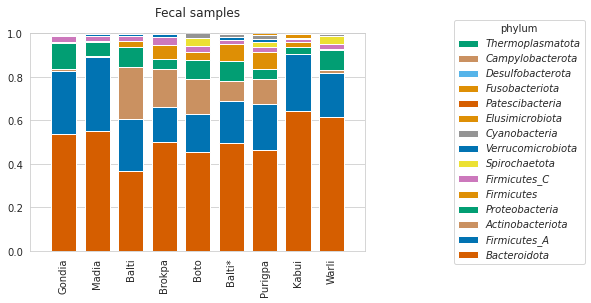

In [30]:
simple_stacks(Fdb[(Fdb['breadth'] >= 0.5) & (Fdb['sample_type'] == 'fecal')], 'tribe', 'rel_ab', 'phylum', palette=c2p, normalize=True)
plt.title('Fecal samples', y=1.05)
#plt.title(f"Average of {db.groupby('sample')['genome'].agg('count').mean()} species per sample")#, size=7)
plt.ylim(0, 1)
#plt.gcf().set_size_inches(4, 3)
#plt.gcf().savefig(figloc + f'StackedBars_{j}_v1.pdf')
plt.show()
    

No handles with labels found to put in legend.


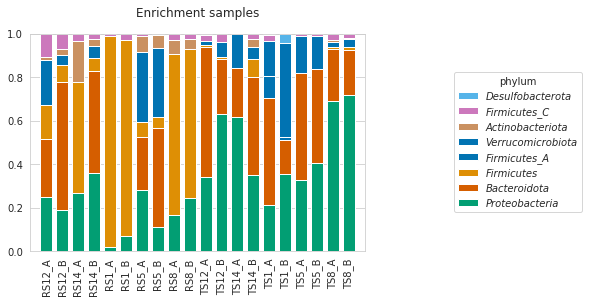

In [32]:
simple_stacks(Fdb[(Fdb['breadth'] >= 0.5) & (Fdb['sample_type'] != 'fecal')], 'sample', 'rel_ab', 'phylum', palette=c2p, normalize=True)
plt.title('Enrichment samples', y=1.05)
#plt.title(f"Average of {db.groupby('sample')['genome'].agg('count').mean()} species per sample")#, size=7)
plt.ylim(0, 1)
#plt.gcf().set_size_inches(4, 3)
#plt.gcf().savefig(figloc + f'StackedBars_{j}_v1.pdf')
plt.show()
    

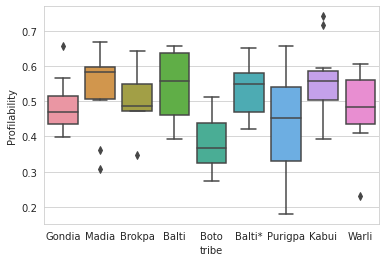

In [43]:
fdb = Fdb[Fdb['breadth'] >= 0.5].groupby(['sample', 'tribe', 'sample_type'])['rel_ab'].sum().to_frame().reset_index()
sns.boxplot(data=fdb[fdb['sample_type'] == 'fecal'], x='tribe', y='rel_ab')
plt.ylabel("Profilability")
plt.show()

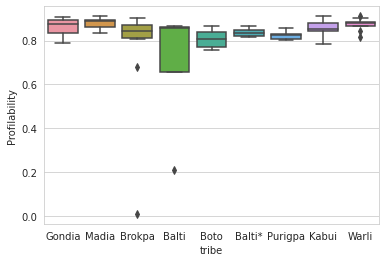

In [46]:
fdb = Fdb.groupby(['sample', 'tribe', 'sample_type'])['rel_ab'].sum().to_frame().reset_index()
sns.boxplot(data=fdb[fdb['sample_type'] == 'fecal'], x='tribe', y='rel_ab')
plt.ylabel("Profilability")
plt.show()


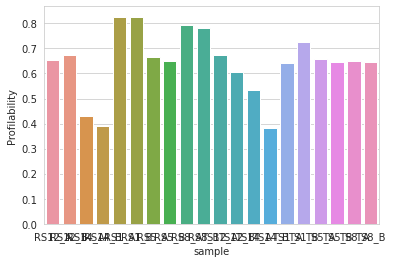

In [45]:
fdb = Fdb[Fdb['breadth'] >= 0.5].groupby(['sample', 'tribe', 'sample_type'])['rel_ab'].sum().to_frame().reset_index()
sns.barplot(data=fdb[fdb['sample_type'] != 'fecal'], x='sample', y='rel_ab')
plt.ylabel("Profilability")
plt.show()